In [123]:
# Reading the data and seeing a few samples

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO  
import pydotplus

#give the location of the file below. I have used mine

df =pd.read_csv("/Users/sarojakondamudi/Desktop/Stevens/Courses-DS-2020/Applied Machine learning/Homework/HW3/Titanic.csv" , index_col = 0)

In [124]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [125]:
df['pclass_new']= df['pclass'].replace('1st','1').replace('2nd','2').replace('3rd','3')
df['sex_new']= df['sex'].replace('female','0').replace('male','1')
df['age'] = df['age'].fillna(0)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,pclass_new,sex_new
1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO",1,0
2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON",1,1
3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,1
5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


In [126]:
df.sibsp.unique()

array([0, 1, 2, 3, 4, 5, 8])

In [127]:
df_req=df.drop(columns=['pclass','name','sex','parch','ticket','fare','cabin','embarked','boat','body','home.dest'])

In [128]:
df_req.isna().sum()

survived      0
age           0
sibsp         0
pclass_new    0
sex_new       0
dtype: int64

In [129]:
datatypes = df_req.dtypes
datatypes

survived        int64
age           float64
sibsp           int64
pclass_new     object
sex_new        object
dtype: object

In [130]:
# dividing the data into 80 % training and 20 % test data
x = df_req[['pclass_new','sex_new','age','sibsp']]
x.shape

(1309, 4)

In [131]:
y = df_req[['survived']]
y.shape

(1309, 1)

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [133]:
x_train.shape

(1047, 4)

In [134]:
y_train.shape

(1047, 1)

In [135]:
x_test.shape

(262, 4)

In [136]:
y_test.shape

(262, 1)

In [137]:
from sklearn import metrics
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print("Accuracy: Training data",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy: Test Data",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: Training data 0.89207258834766
Accuracy: Test Data 0.7557251908396947


In [138]:
# to print the tree. For some reason i got errors. Just including the code
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 41)
dt.fit(x_train, y_train)
export_graphviz(dt , out_file = 'dt.dot' , 
                feature_names= ['pclass_new','sex_new','age','sibsp'] , class_names= ['1','0'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

AttributeError: 'list' object has no attribute 'write_png'

In [139]:
from sklearn.metrics import confusion_matrix
cm_train_dataset = confusion_matrix(y_train_pred , y_train)
print(cm_train_dataset)

[[640  88]
 [ 25 294]]


In [140]:
print(cm_train_dataset.ravel())

[640  88  25 294]


In [141]:
truepositive ,falsepositive , falsenegative , truenegative = cm_train_dataset.ravel()

print(truepositive, falsenegative)

640 25


In [142]:
# Training dataset
tpr = (truepositive)/(truepositive + falsenegative)
print(tpr)
print("in‐sample percent survivors correctly predicted: " , tpr * 100)

0.9624060150375939
in‐sample percent survivors correctly predicted:  96.2406015037594


In [143]:
tnr = truenegative / (truenegative+ falsepositive)
print("in-sample percent fatalities correctly predicted (on training set) : " , tnr * 100)

in-sample percent fatalities correctly predicted (on training set) :  76.96335078534031


In [144]:
# test data set
cm_test_dataset = confusion_matrix(y_test_pred , y_test)
print(cm_test_dataset)

[[127  47]
 [ 17  71]]


In [145]:
tp_test , fp_test , fn_test ,tn_test = cm_test_dataset.ravel()
print(tp_test , fp_test , fn_test ,tn_test)

127 47 17 71


In [146]:
tpr_test = (tp_test)/(tp_test + fn_test)
print("out‐of‐sample percent survivors correctly predicted (on test set) :" , tpr_test* 100)

out‐of‐sample percent survivors correctly predicted (on test set) : 88.19444444444444


In [147]:
tnr_test = tn_test / (tn_test+ fp_test)
print("out-of‐sample percent fatalities correctly predicted (on test set) " ,tnr_test * 100)

out-of‐sample percent fatalities correctly predicted (on test set)  60.16949152542372


In [152]:
from sklearn.model_selection import GridSearchCV
#build the parameter grid
DT_classifier = DecisionTreeClassifier()
DT_grid = [{'max_depth': [3,4,5,6,7,8,9,10,11,12],'max_leaf_nodes': [None,2 ,3,4,5,6,7,8,9] ,
            'criterion':['gini','entropy']}]

#build a grid search to find the best parameters
gridsearchDT  = GridSearchCV(DT_classifier, DT_grid, cv=5)

#run the grid search
gridsearchDT.fit(x_train,y_train)

score = gridsearchDT.cv_results_
print(gridsearchDT.best_params_)
scores = gridsearchDT.cv_results_

{'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': None}


In [153]:
data_frame = pd.DataFrame(scores)
print(data_frame.columns)
data_frame_max_depth_score =   data_frame[["param_max_depth" ,"mean_test_score"]]
data_frame_max_depth_score["mean_test_score"] = data_frame_max_depth_score["mean_test_score"] * 100
print(data_frame_max_depth_score)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_max_leaf_nodes', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')
    param_max_depth  mean_test_score
0                 3        78.414518
1                 3        78.605540
2                 3        78.510029
3                 3        78.414518
4                 3        78.414518
..              ...              ...
175              12        78.510029
176              12        77.745941
177              12        78.510029
178              12        78.796562
179              12        78.796562

[180 rows x 2 columns]


/Users/sarojakondamudi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [154]:
data_frame

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003512,0.000228,0.001110,0.000071,gini,3,None,"{'criterion': 'gini', 'max_depth': 3, 'max_lea...",0.800000,0.800000,0.794258,0.803828,0.722488,0.784145,0.030943,146
1,0.003631,0.000182,0.001169,0.000067,gini,3,2,"{'criterion': 'gini', 'max_depth': 3, 'max_lea...",0.800000,0.795238,0.813397,0.799043,0.722488,0.786055,0.032333,69
2,0.003251,0.000193,0.001076,0.000096,gini,3,3,"{'criterion': 'gini', 'max_depth': 3, 'max_lea...",0.809524,0.804762,0.779904,0.808612,0.722488,0.785100,0.033098,89
3,0.003245,0.000140,0.001036,0.000015,gini,3,4,"{'criterion': 'gini', 'max_depth': 3, 'max_lea...",0.809524,0.800000,0.779904,0.808612,0.722488,0.784145,0.032582,146
4,0.002942,0.000164,0.000943,0.000050,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'max_lea...",0.800000,0.800000,0.794258,0.803828,0.722488,0.784145,0.030943,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.002267,0.000097,0.000718,0.000027,entropy,12,5,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.809524,0.804762,0.779904,0.808612,0.722488,0.785100,0.033098,89
176,0.002303,0.000098,0.000729,0.000045,entropy,12,6,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.800000,0.800000,0.779904,0.784689,0.722488,0.777459,0.028612,172
177,0.002264,0.000046,0.000761,0.000058,entropy,12,7,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.819048,0.800000,0.779904,0.803828,0.722488,0.785100,0.033669,89
178,0.002354,0.000094,0.000751,0.000061,entropy,12,8,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.819048,0.804762,0.794258,0.799043,0.722488,0.787966,0.033743,50


In [156]:
missclassified = []
for  s in range(2, 11):
    dt = DecisionTreeClassifier(criterion = "entropy", 
                               max_leaf_nodes  = s, max_depth = s ,random_state =42)
    dt.fit(x_train , y_train)
    pred = dt.predict(x_train)
    cm_train_set = confusion_matrix(pred , y_train).ravel()
    fp ,fn = cm_train_set[1:3]
    missclass  = fp + fn
    missclassified.append(missclass)
    
print(missclassified)

[224, 213, 213, 213, 212, 210, 193, 193, 193]


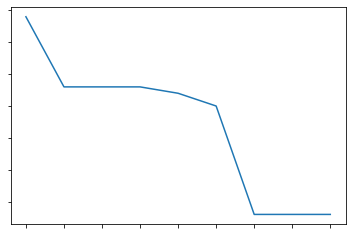

In [165]:
import matplotlib.pyplot as plt
x=[]
for i in range(2,11):
    x.append(i)
y = missclassified
plt.plot(x, y)
plt.xlabel('Tree size')
plt.ylabel('missclassified')
plt.show()

In [182]:
clf_pruned = DecisionTreeClassifier(random_state = 42 ,max_depth = 2)
clf_pruned.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [183]:
clf_pruned.fit(x_train, y_train)
export_graphviz(dt , out_file = 'clf_pruned_2.dot' , feature_names= ['pclass_new','sex_new','age','sibsp'] , 
                class_names= ['1','0'])


In [184]:
# Some problem with graphviz in Macbook. Working fine in Windows
Image('clf_pruned_2.png', width = 950 ,height = 950)

FileNotFoundError: No such file or directory: 'clf_pruned_2.png'

FileNotFoundError: No such file or directory: 'clf_pruned_2.png'

<IPython.core.display.Image object>

In [185]:
train_dataset_prediction= clf_pruned.predict(x_train)

In [186]:
#Training dataset"
score_pruned  = metrics.accuracy_score(train_dataset_prediction ,y_train)
print(score_pruned * 100)

79.65616045845272


In [187]:
#Testing dataset "
clf_pruned.fit(x_train ,y_train)
test_dataset_prediction  = clf_pruned.predict(x_test)
test_dataset_accuracy = metrics.accuracy_score(test_dataset_prediction , y_test)
print(test_dataset_accuracy * 100)

72.90076335877863


In [188]:
# Train Dataset
cm_train_dataset_pruned = confusion_matrix(train_dataset_prediction, y_train)
print(cm_train_dataset_pruned)

[[652 200]
 [ 13 182]]


In [189]:
tp_p ,fp_p , fn_p , tn_p = cm_train_dataset_pruned.ravel()
tpr_p = (tp_p)/(tp_p +fn_p)
print(tpr_p)
print("in‐sample percent survivors correctly predicted: " , tpr_p * 100)

0.9804511278195489
in‐sample percent survivors correctly predicted:  98.04511278195488


In [190]:
tnr_p = tn_p / (tn_p+ fp_p)
print(tnr_p)
print("in-sample percent fatalities correctly predicted (on training set) : " , tnr_p * 100)

0.47643979057591623
in-sample percent fatalities correctly predicted (on training set) :  47.64397905759162


In [194]:
# Test Set 

cm_test_data_pruned = confusion_matrix(test_dataset_prediction , y_test)
tp_test_p , fp_test_p , fn_test_p ,tn_test_p = cm_test_data_pruned.ravel()
tpr_test_p = (tp_test_p)/(tp_test_p + fn_test_p)
print("out‐of‐sample percent survivors correctly predicted (on test set) :" , tpr_test_p* 100)

out‐of‐sample percent survivors correctly predicted (on test set) : 97.22222222222221


In [195]:
tnr_test_p = tn_test_p / (tn_test_p+ fp_test_p)
print(tnr_test_p)
print("out-of‐sample percent fatalities correctly predicted (on test set) " ,tnr_test_p * 100)

0.4322033898305085
out-of‐sample percent fatalities correctly predicted (on test set)  43.22033898305085


In [197]:
#There is an imporvement in out‐of‐sample for the full tree (bigger model) and the pruned tree (smaller model).